# Decision Trees

Decision trees are algorithms used to perform classfication and regression.

Previously we fitted DecisionTreeRegressor on the california housing data set. 

Decision trees are used as components in Random forest.

Lets begin by building a simple decision tree



In [6]:
#  A simple decision tree

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[:,2:] # We are using petal length and width

y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2)

tree_clf.fit(X,y)




DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

To visualize the tree you just built, use export_graphviz() function



In [8]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file="iris_tree.png", feature_names = iris.feature_names[2:], class_names = iris.target_names,
               rounded = True, filled=True)

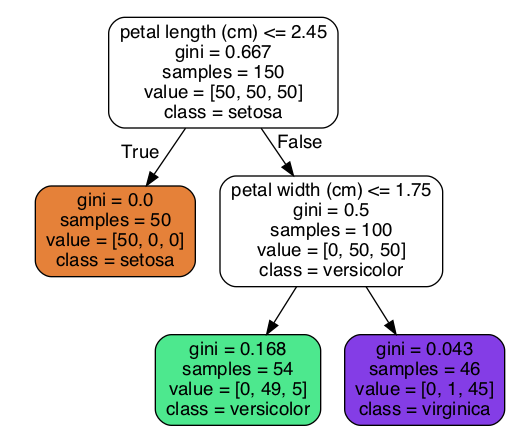

# How are predictions made?

Case 1: petal length = 2.3 

Suppose you have a sample having petal length  = 2.3

At the rood node, the decision tree checks if petal lenth  <= 2.45.

In this case petal length = 2.3

We move down the left node for which is a leaf node (does not have any child nodes of its own).

Therefore, we predict that the sample belongs to class setosa.

Case 2: petal length = 2.5 and petal width = 1.6

At the rode node we move right since petal length = 2.5 (greater than 2.45)

at the second node, we move left because petal width = 1.6 ( less than 1.75)

we are now at a leaf node. 

Therefore, we predict that the sample belongs to class versicolor

Case 3: petal length = 2.5 and petal width = 1.9

At the rode node we move right since petal length = 2.5 (greater than 2.45)

At the second node, we move right because petal width = 1.9 ( greater than 1.75)

we are now at a leaf node. 

Therefore, we predict that the sample belongs to class virginica



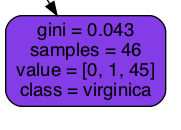

Lets understand how paramters and their values are calculated

1) gini is a measure of purity of a node. 

A node is a pure node when gini = 0. Gini = 0 when all samples reaching a node belong to the same class.

Gini index of a node is calculated using the following formula:

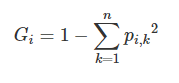

pi,k is the ratio of class k instances among the training instances in the ith node.

Therefore, the node above has a gini = 1 - (0/46)^2 - (1/46)^2 - (45/46)^2  = 0.043

2) Samples - measure the number of samples (data points) that reached this node

for example we have 46 samples that reached the node in above picture.

3) value - list containing the classes of all samples that reached the node

for example, we have 46 samples out of which  0 belong to Iris setosa, 1 belongs to  Iris versicolor and 45 belong Iris virginica.




Note: Sci-kit learn uses CART algorithm which does binary splits (creates a binary) while another alogirthm called ID3 generates more than 2 splits.

Also, CART uses gini index for measuring impurity whereas ID3 uses entrophy to measure impurity



# Decision boundaries

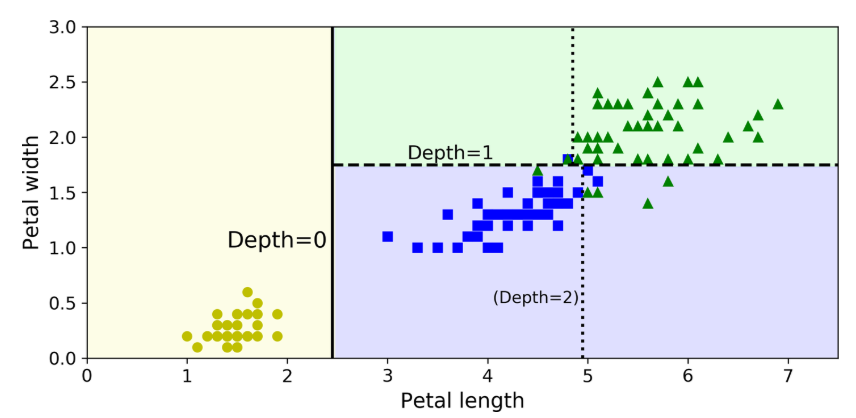



Note:

1) The first boundary at root node (depth = 0) is created at petal length = 2.45

2) the second boundary at depth = 1 is creared at petal width = 1.75 (dashed line).

3) In the code if you change max_depth to 3  the two depth-2 nodes would each add another decision boundary (vertical dotted line in green and blue region)



# Estimating class probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular class k.

The model traverses the tree to find the leaf node for the sample and then it returns the following ratio for each class

(No of samples of class k) /( No of samples of all classes at the node)

Example:

Suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide

Decision Tree will  output the following probabilities: 0% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54), and 9.3% for Iris virginica (5/54)

In [10]:
# Check probabilities

tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [11]:
# check prediction

tree_clf.predict([[5,1.5]])

array([1])

The instance is classified as a Class veriscolor because it has the highest probability of 90.7% 

# Goodness of split

To decide which feature to split on, decision tree algorithms use a quantified measure called impurity.

A split is pure if after the split for all branches, all the instances  that go down a branch belong to the same class.

The next question is how do we calculate impurity.

One possible function to measure impurity is entropy.

Entrophy in information theory specifies the minimum number of bits needed to encode the class code of an instance.

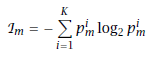



In a twoclass problem, 

if p1 = 1 and p2 = 0, all examples are of Class 1, and we do not need to send anything, and the entropy is 0.

If p1 = p2 = 0.5, we need to send a bit to signal one of the two cases, and the entropy is 1.

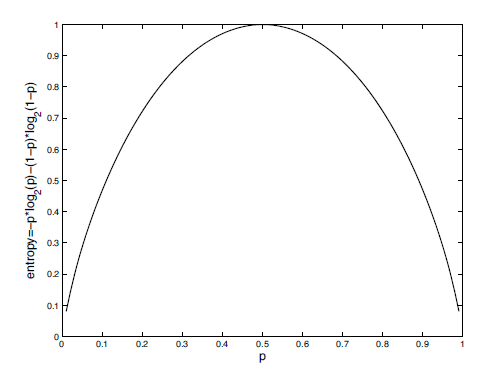

# Is Entropy the only measure of impurity?

No, Entropy is one such measure.

For a two-class problem

where p1 = p and p2 = 1 − p, 

φ(p, 1 − p) is a nonnegative function measuring the impurity of a split if it satisfies the following properties
(Devroye, Györfi, and Lugosi 1996):

 φ(1/2, 1/2) ≥ φ(p, 1 − p), for any p ∈ [0, 1].

 φ(0, 1) = φ(1, 0) = 0.

 φ(p, 1−p) is increasing in p on [0, 1/2] and decreasing in p on [1/2, 1].



Some examples of functions that can be used to measure impurity are:

1) Entropy

φ(p, 1 − p) = −p log2 p − (1 − p) log2(1 − p)


2) Gini Index

φ(p, 1 − p) = 2p(1 − p)


3) Misclassification error

φ(p, 1 − p) = 1 −max(p, 1 − p)



# Entropy

Entropy is a way to measure how random a random variable is.

Entropy is also a way to measure the disorder.

Mathematical formula for entropy is:

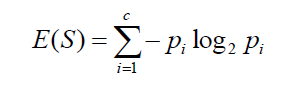

where Pi = probability of an element/class ‘i’ in our data

Example:

lets say we have 2 classes: class 0 and class 1

if we have 100 data points, 

30 from class 0

70 from class 1

then 

P0 = 30/100 = 3/10

P1 = 70/100 = 7/10

Entropy in this case would be:
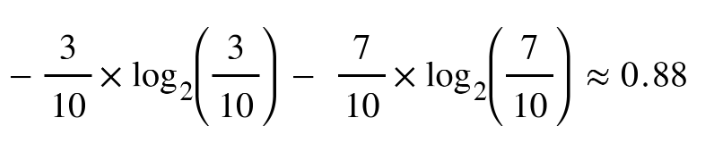

This is considered a high entropy , a high level of disorder ( meaning low level of purity).

Entropy is measured between 0 and 1.

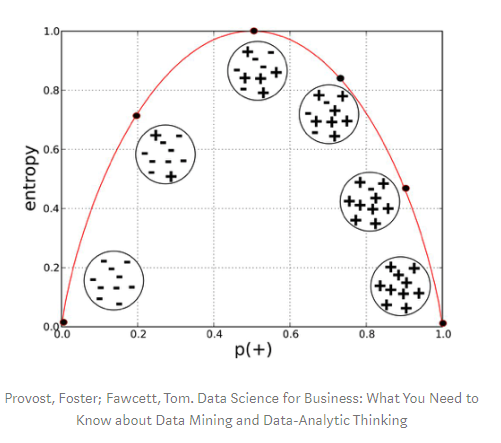

The x-axis measures the proportion of data points belonging to the positive class in each bubble and the y-axis axis measures their respective entropies.

Entropy is lowest at the extremes, when the bubble either contains no positive instances or only positive instances.That is, when the bubble is pure the disorder is 0.

Entropy is highest in the middle when the bubble is evenly split between positive and negative instances. Extreme disorder , because there is no majority.


Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.

    

Next, we need a metric to measure how this disorder (entropy) changes when use a feature to split a node

This is where Information Gain comes in. Mathematically it can be written as:

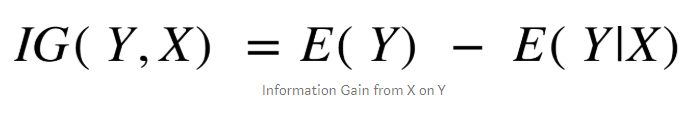

We simply subtract the entropy of Y given X from the entropy of just Y to calculate the reduction of uncertainty about Y given an additional piece of information X about Y. This is called Information Gain. 

Lets use an example to understand how decisions trees use entropy and information gain to decide what feature to split their nodes on as they are being trained on a data set.

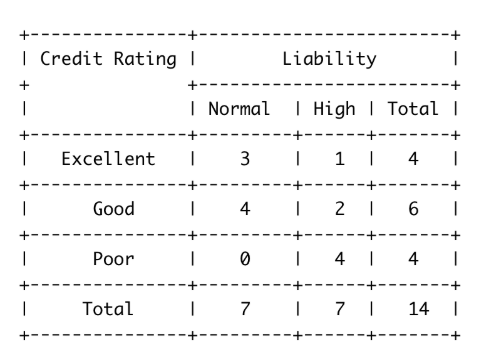

In this table,

target variable = liability (takes values - Normal, high)

one feature = credit rating (takes values - excellent, good, poor)

There are a total of 14 observations. 7 of them belong to the Normal Liability class and 7 belong to High Liability Class. There is an even split between both classes.

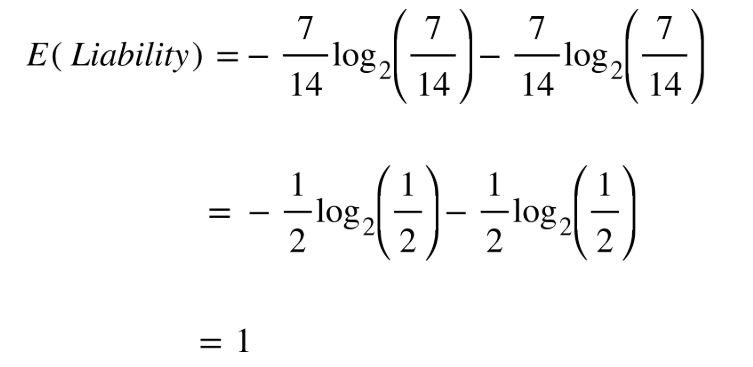



The entropy of our target variable is 1, at maximum disorder due to the even split between class label “Normal” and “High”.


The next step is to calculate Entropy of liability using additional information such as credit score.

For this, we will calculate:

1) entropy for Liability for each value of Credit Score 

2) calculate weighted average of proportions of observations that end in each value.

Step 1)


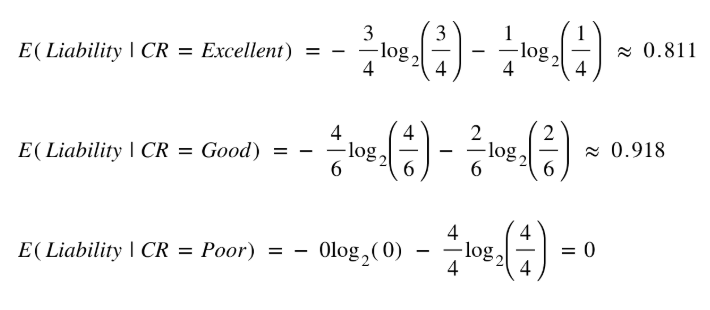



Step 2)


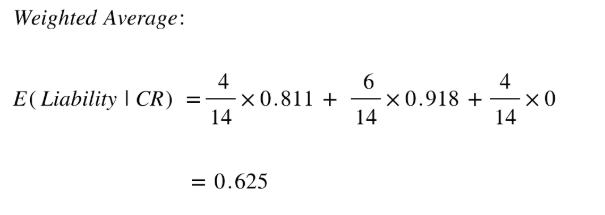

We got the entropy for our target variable given the feature Credit Rating.

Now we can compute the Information Gain on Liability from Credit Rating to see how informative this feature is.

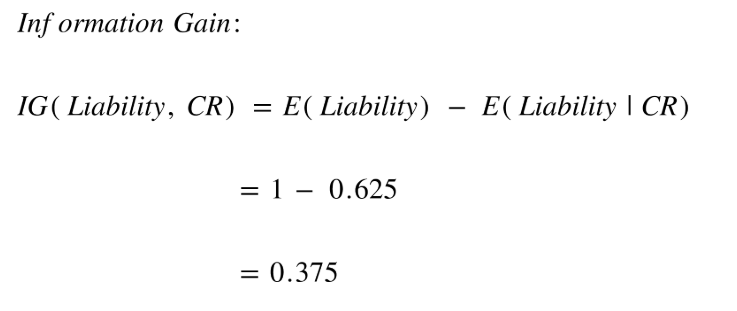

Well that’s exactly how and why decision trees use entropy and information gain to determine which feature to split their nodes.

The feature that reduces impurity the most is choosen to split the tree.

Lets see a full example next



# ID3

Lets build a ID3 decision tree using the weather data set.

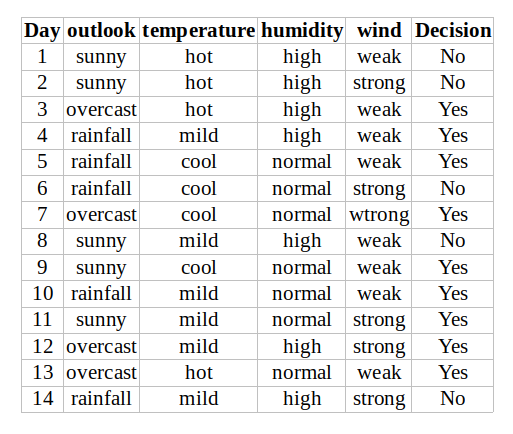


It has four attributes, outlook, humidity, temperature and wind.

The attribute which will have highest information gain is selected as a node.



ID3 decision tree uses:

1) It uses entropy as metric.

2) It is used for only classification problem.

Root node

From the data set,we have:

Number of observations = 14

Number of observations having Decision ‘Yes’ = 9

probability of ‘Yes’ , p(Yes) = 9/14

Number of observations having Decision ‘No’ =5

probability of ‘No’ , p(No) = 5/14

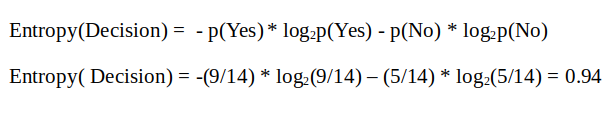

Since we have 4 attributes: outlook, temperature, humidity, and wind

We need to calculate information gain for each attribute

Lets us begin with Outlook

Outlook has 3 values: sunny, overcast and rainfall

For outlook = sunny we have 5 instances

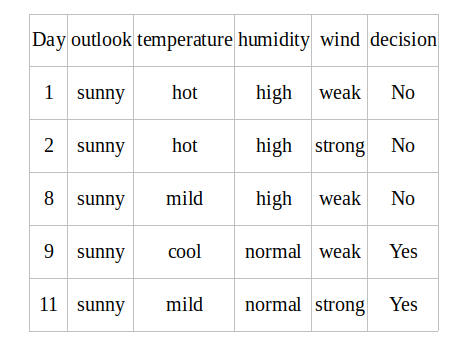



When outlook = sunny,

Prob( Decision = yes | outlook = sunny ) =  2/5

Prob( Decision = no | outlook = sunny ) = 3/5

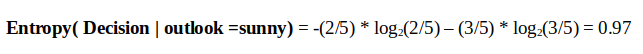

Similarly, we can calculate the Entropy for Outlook = overcast and outlook = rainfall

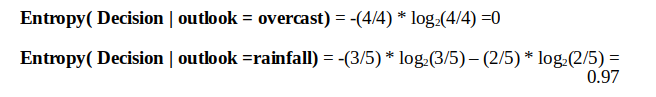

Information Gain is calculated using 

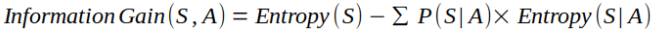

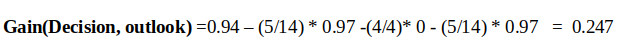



Similarly, the information for all attributes is calculated as follows:

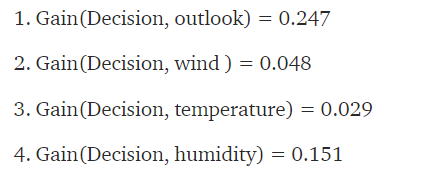

Outlook therefore has the highest information gain and is chosen as the root node

Our decision tree looks as follows:

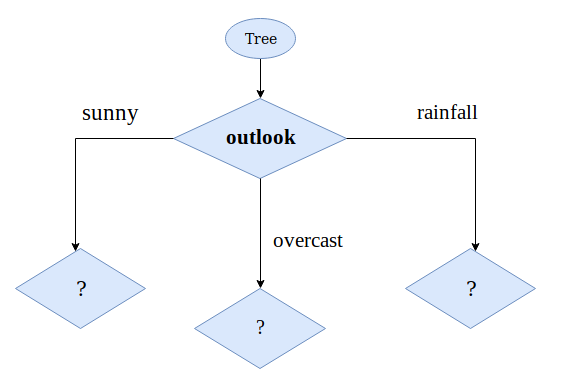

Next lets choose an attribute to split on for branch outlook = sunny

only 5 instances do down this branch

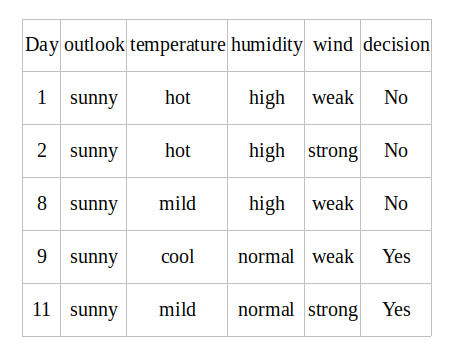

Lets look at Information Gain on Temperature under Sunny outlook factor

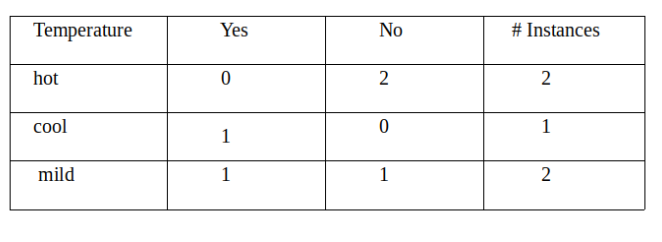

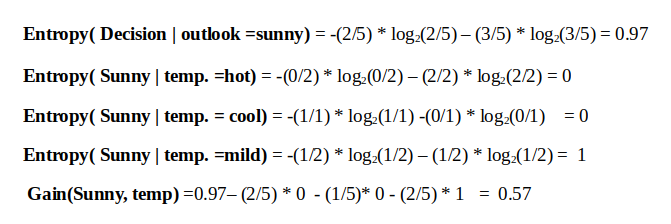

Similary, we calculate the information gain for all attributes in branch outlook = sunny

Gain(sunny, temp) = 0.57

Gain(sunny, humidity) = 0.97

Gain(sunny, wind) =0.019

Humidity has the highest gain. Therefore, the next node on this branch will be Humidity

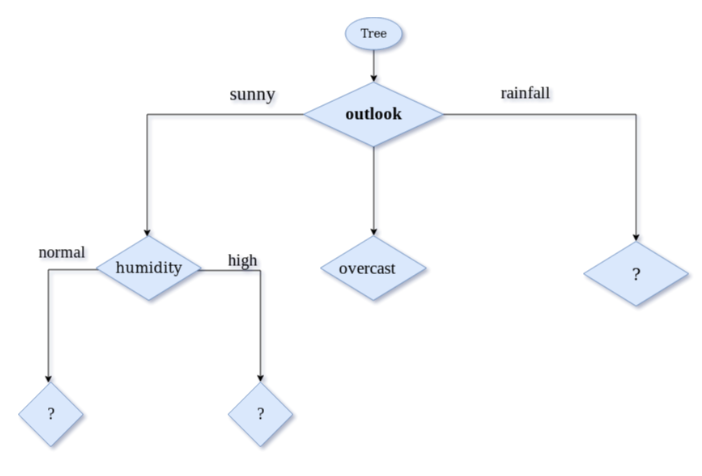

Information Gain on overcast outlook factor

There are 4 instances that go down branch outlook = overcast

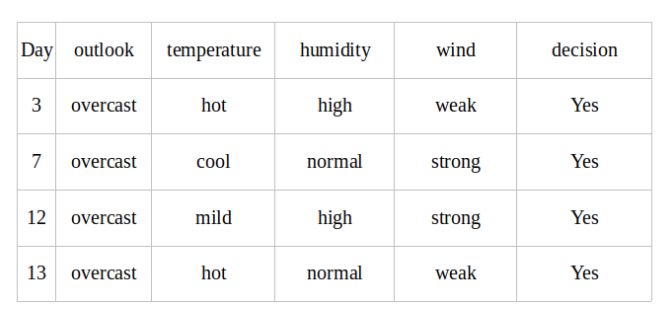

Total number of instances (samples) = 4 

Prob(Decision=’Yes’,overcast) = 1  ( all 4 rows have decision = yes)

Prob(Decision=’No’,overcast) = 0 

Since all decisions are yes,

Entropy(Decision, Overcast) = 0

So if outlook = overcast then decision is always yes.

This is therefore a leaf node (cannot be split further)

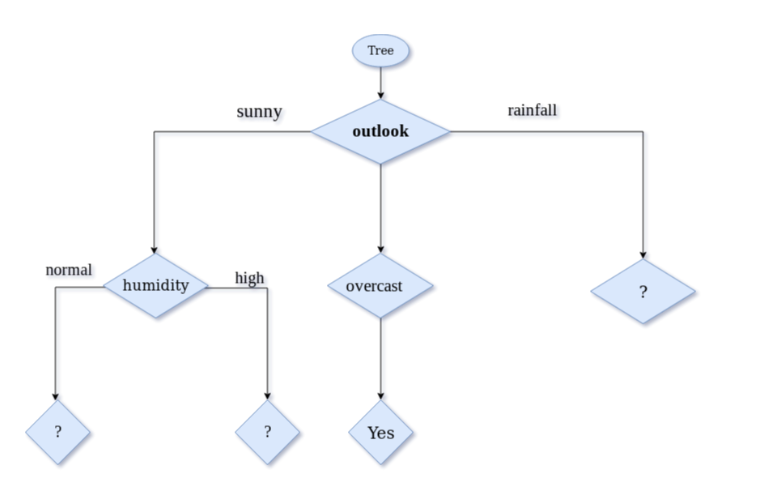



Information Gain on humidity factor

humidity takes two value, normal and high.

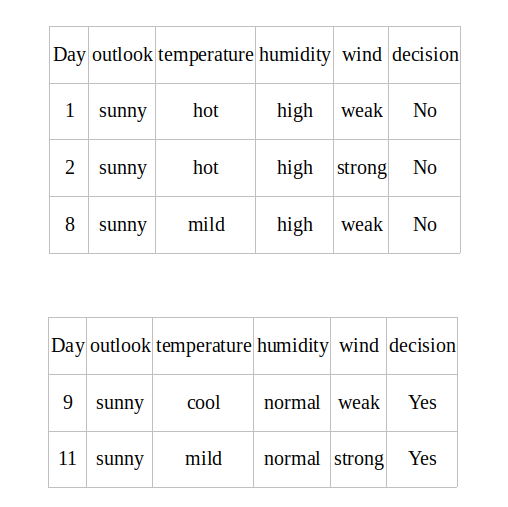

From this table, we can see that:

when humidity = high, decision = no

when humidity = normal, decision = yes



Information Gain on Rainfall outlook factor

There are 5 instances that go down branch outlook = rainfall

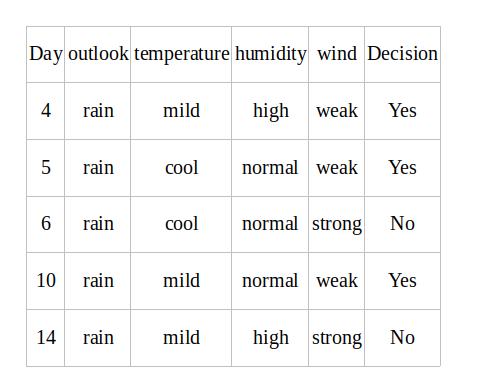


Lets calculate the prob of decision when outlook = rain


Prob (decision = yes | outlook = rain) = 3/5

Prob (decision = no | outlook = rain) = 2/5 

Information Gain on Wind under rainfall outlook factor

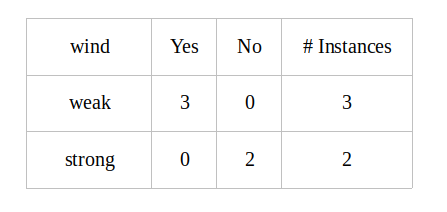

Entropy (rainfall, wind) =0

Gain(rainfall, wind)=0.97

Similary, we calculate and compare gain on all attributes on branch outlook = rain

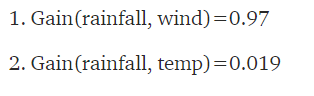

wind attribute has highest information gain. So it is selected as next node on the branch outlook = rain.

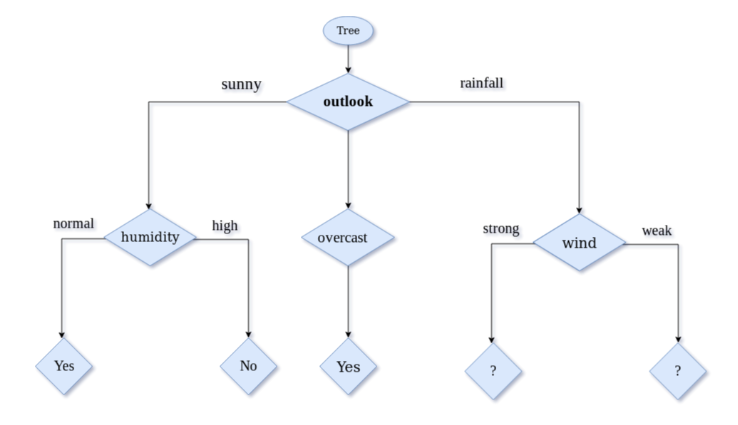

Information Gain on wind

Wind has 2 values: weak and strong

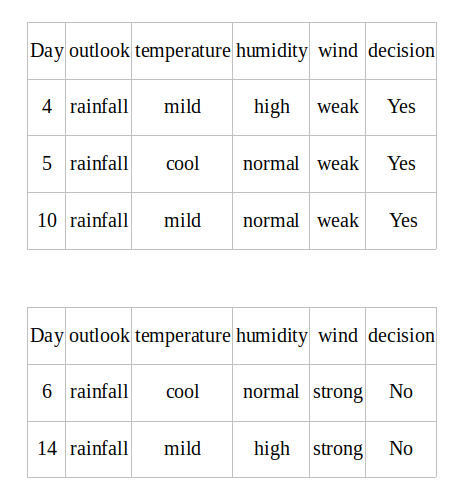

from the table we can see that:

when wind = weak then decision = yes

when wind = strong then decision = no



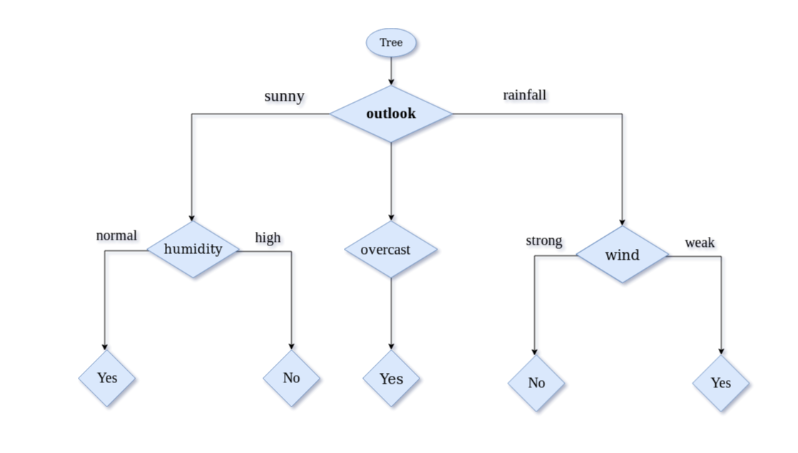

Thats it!!!

Decision tree is ready. Pretty cool how simple yet powerful it is.


# CART

1) CART is used for classification and regression

2) Uses Gini Index to choose feature to split on

3) Uses least squares to choose feature to split on in case of regression trees.

Gini index is calculated using the following formula:

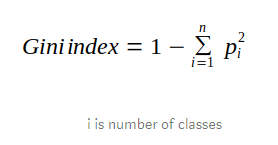

Lets use the weather data set again

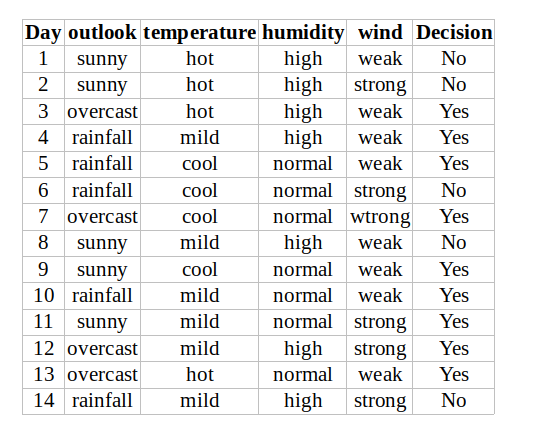

Features =  outlook, temperature, humidity, wind 

# Outlook

Outlook is a nominal feature. It takes 3 values: sunny, overcast and rainfall.

The frequency table for each feature is as follows:

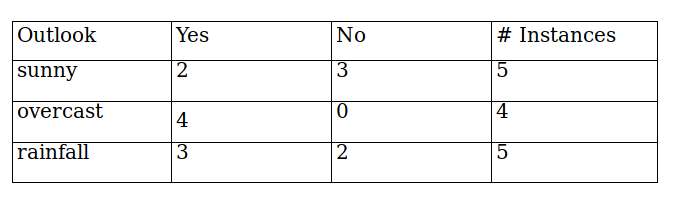

Gini index (outlook=sunny)= 1-(2/5)²-(3/5)² = 1- 0.16–0.36 = 0.48

Gini index(outlook=overcast)= 1- (4/4)²-(0/4)² = 1- 1- 0 = 0

Gini index(outlook=rainfall)= 1- (3/5)² -(2/5)² = 1- 0.36- 0.16 = 0.48

Next, we calculate the weighted sum of Gini index for outlook values

Gini(outlook) = (5/14)*0.48 + (4/14) *0 + (5/14)*0.48 = 0.342

# Temperature


Similarly, temperature is also a nominal feature, it can take three values, hot,cold and mild

Frequency table:

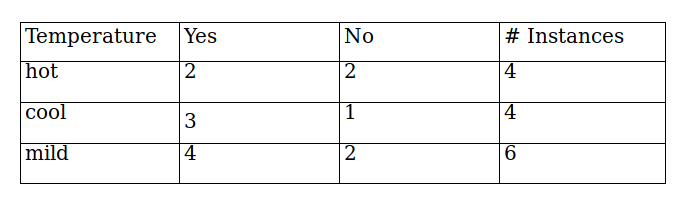


Gini(temperature=hot) = 1-(2/4)²-(2/4)² = 0.5

Gini(temperature=cool) = 1-(3/4)²-(1/4)² = 0.375

Gini(temperature=mild) = 1-(4/6)²-(2/6)² = 0.445

Next, we calculate the weighted sum of Gini index for temperature values

Gini(temperature)= (4/14) *0.5 + (4/14) *0.375 + (6/14) *0.445 =0.439

# Humidity

Humidity is a binary class feature , it can take two value high and normal.

Frequency table:

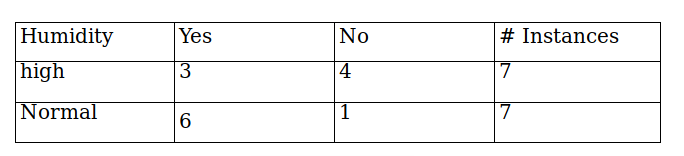

Gini(humidity=high) = 1-(3/7)²-(4/7)² = 0.489

Gini(humidity=normal) = 1-(6/7)²-(1/7)² = 0.244

Next, we calculate the weighted sum of Gini index for Humidity values

Gini(humidity) = (7/14) *0.489 + (7/14) *0.244=0.367


# Wind

wind is a binary class feature , it can take two value weak and strong.

Frequency table:

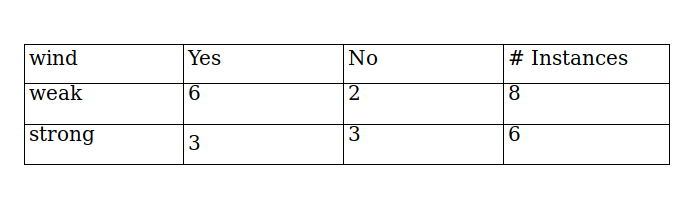

Gini(wind=weak)= 1-(6/8)²-(2/8)² = 0.375

Gini(wind=strong)= 1-(3/6)²-(3/6)²= 0.5

Next, we calculate the weighted sum of Gini index for wind values

Gini(wind) = (8/14) *0.375 + (6/14) *0.5=0.428

# Root Node Decision

Gini index for all features

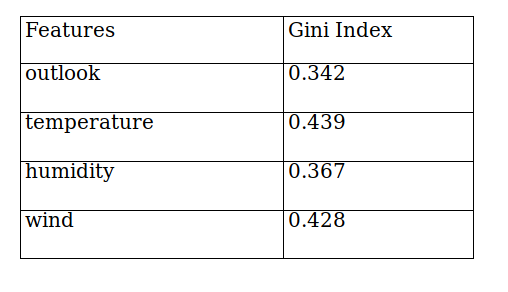

Outlook has the lowest gini index, so outlook will be used to split the root node

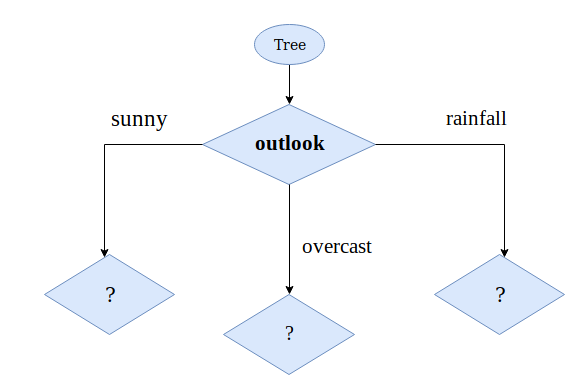

We repeat the same process for each subset of the training samples that flow down each branch.

For outlook=sunny, the following instances flow down branch outlook = sunny

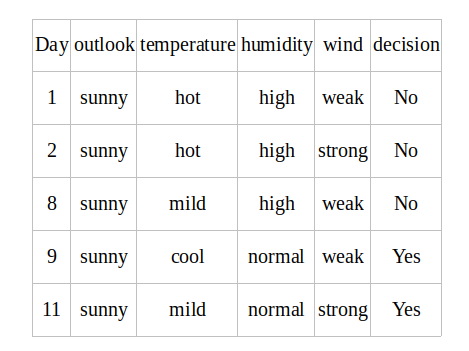

we need to find the Gini index for temperature, humidity and wind features respectively

# Gini index for temperature for outlook  = sunny

Frequency table:

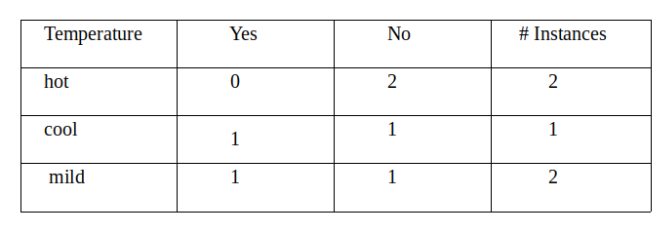

Gini(outlook=sunny & temperature=hot) = 1-(0/2)²-(2/2)² = 0

Gini(outlook=sunny & temperature=cool) = 1-(1/1)²-(0/1)² = 0

Gini(outlook=sunny & temperature=mild) = 1-(1/2)²-(1/2)² = 0.5

Next, the weighted sum of Gini index for temperature when outlook = sunny

Gini(outlook=sunny & temperature)= (2/5) *0 + (1/5) *0+ (2/5) *0.5 =0.2


# Gini Index for humidity on sunny outlook

Frequncy table:

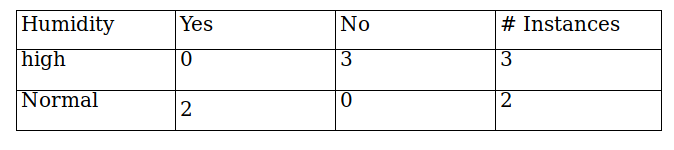

Gini(outlook=sunny & humidity=high) = 1-(0/3)²-(3/3)² = 0

Gini(outlook=sunny & humidity=normal) = 1-(2/2)²-(0/2)² = 0


Next, the weighted sum of Gini index for humidity when outlook = sunny

Gini(outlook = sunny & humidity) = (3/5) *0 + (2/5) *0=0

# Gini Index for wind on sunny outlook

Frequency table:

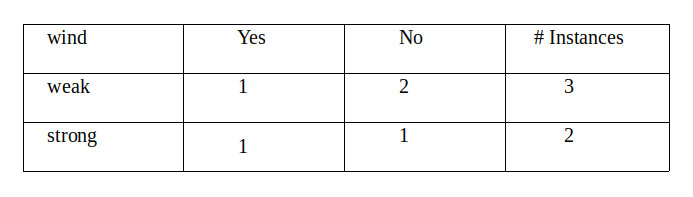

Gini(outlook=sunny & wind=weak) = 1-(1/3)²-(2/3)² = 0.44

Gini(outlook=sunny & wind=strong) = 1-(1/2)²-(1/2)² = 0.5

Next, the weighted sum of Gini index for wind when outlook = sunny

Gini(outlook = sunny and wind) = (3/5) *0.44 + (2/5) *0.5=0.266+0.2= 0.466

# Decision to split for branch outlook = sunny

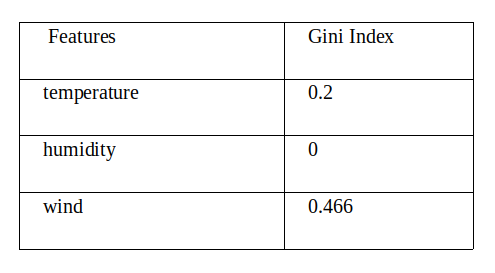



Humidity has the lowest gini index so the next feature to be used for splitting is humidity

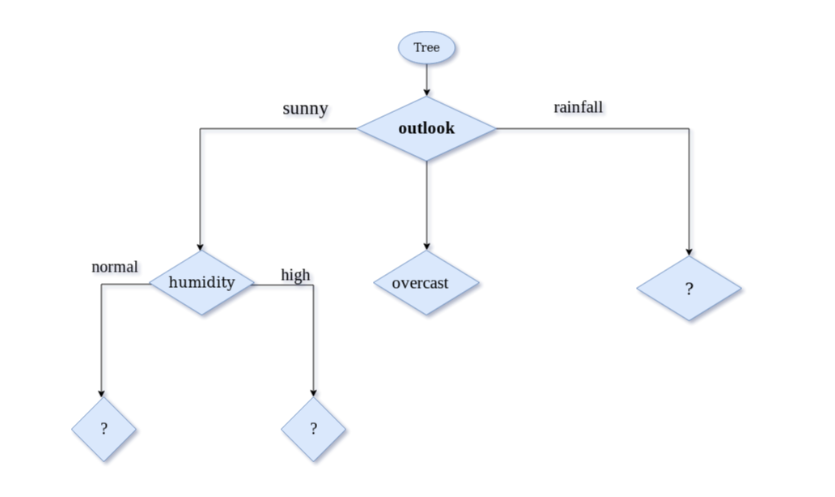

Next, Lets focus on training samples that flow down branch outlook = overcast

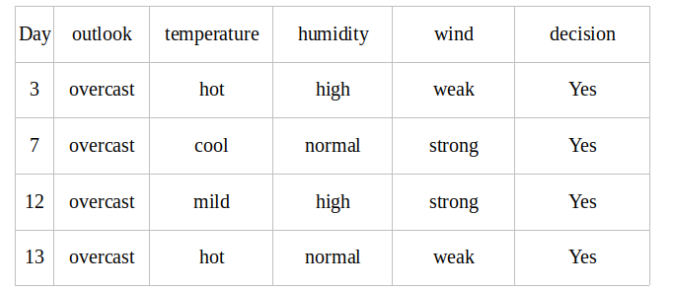

As, you can see from the above table all the decision for overcast outlook feature is always ‘Yes’. Then Gini index for each feature is 0 which means that this is a leaf node

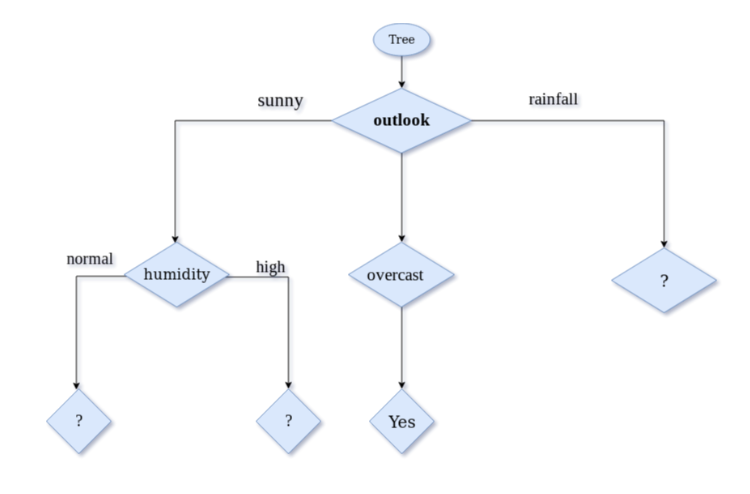

Lets focus on training samples that flow down branch outlook = sunny and then on sub branches humidity = normal and humidity = high.

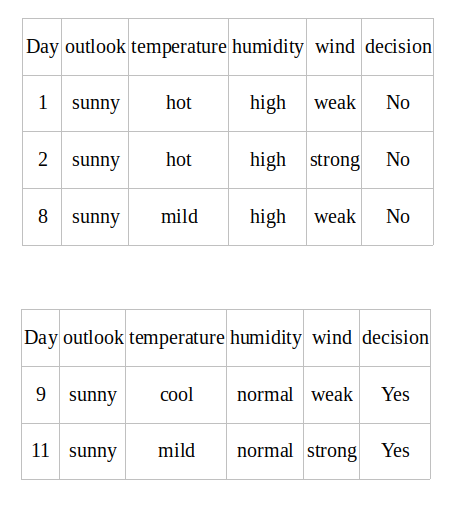

From these tables, we can see that:

decision is always ‘No’ when humidity is ‘high’ and 

decision is always ‘Yes’ when humidity is ‘normal’

Therefore, we get 2 leaf nodes.



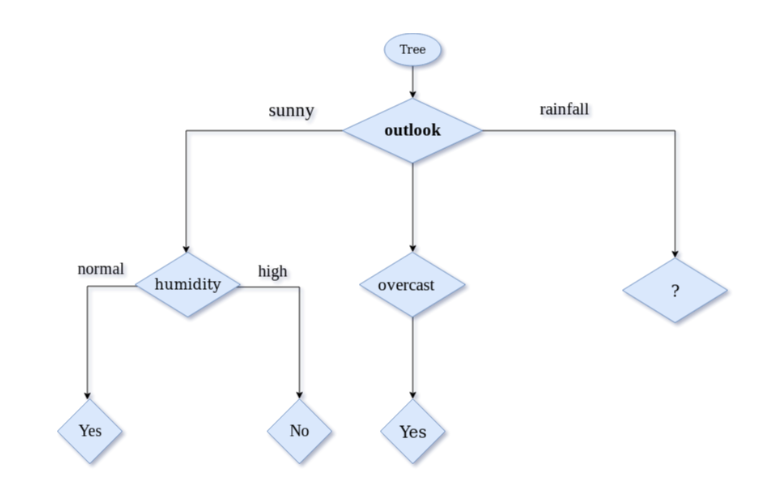

Next, lets focus on training samples that flow down branch outlook = rainfall. we need to find the Gini index for temperature,humidity and wind features respectively.

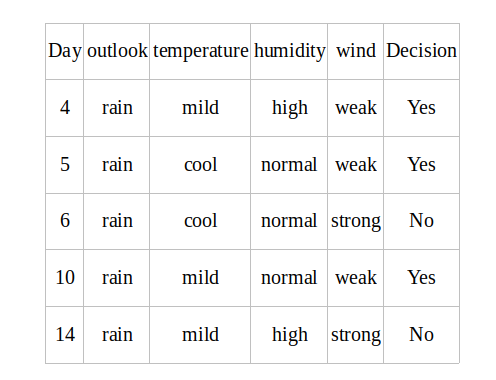

# Gini index for temperature for  outlook = rainfall

Frequency table

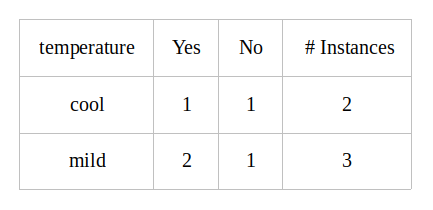

Gini(outlook=rainfall and temp.=Cool) = 1 — (1/2)2 — (1/2)2 = 0.5

Gini(outlook=rainfall and temp.=Mild) = 1 — (2/3)2 — (1/3)2 = 0.444

Next, we calculate the weight sum

Gini(outlook=rainfall and temp.) = (2/5)*0.5 + (3/5)*0.444 = 0.466



# Gini index for humidity for  outlook = rainfall

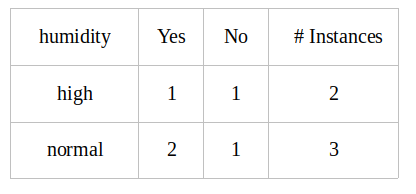

Gini(outlook=rainfall and humidity=high) = 1 — (1/2)2 — (1/2)2 = 0.5

Gini(outlook=rainfall and humidity=normal) = 1 — (2/3)2 — (1/3)2 = 0.444

Next, we calculate the weighted sum

Gini(Outlook=rainfall and humidity) = (2/5)*(0.5 + (3/5)*0.444 = 0.466



# Gini index for wind for rainfall outlook feature


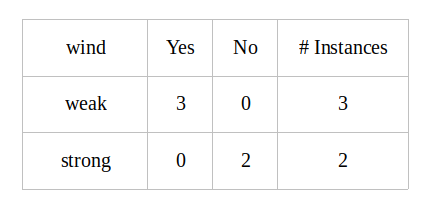


Gini(outlook=rainfall and wind=weak) = 1 — (3/3)2 — (0/3)2 = 0

Gini(outlook=rainfall and wind=strong) = 1 — (0/2)2 — (2/2)2 = 0

Next, we calculate the weighted sum

Gini(outlook=rainfall and wind) = (3/5)*0 + (2/5)*0 = 0

# Decision for branch outlook = rainfall

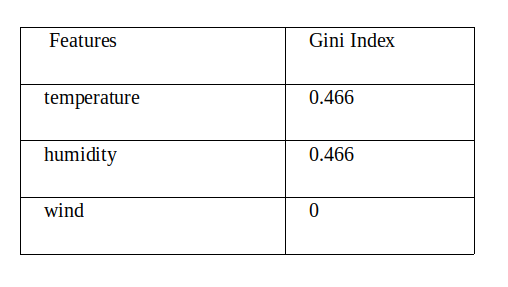


Wind has the lowest gini index so we split using wind.

Decision tree looks like the following:




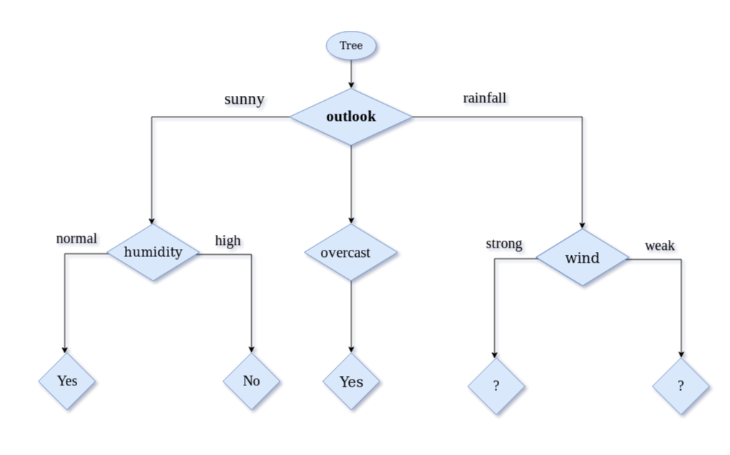

Next we focus on the training samples that flow down branch = rainfall and have wind = strong or wind = weak

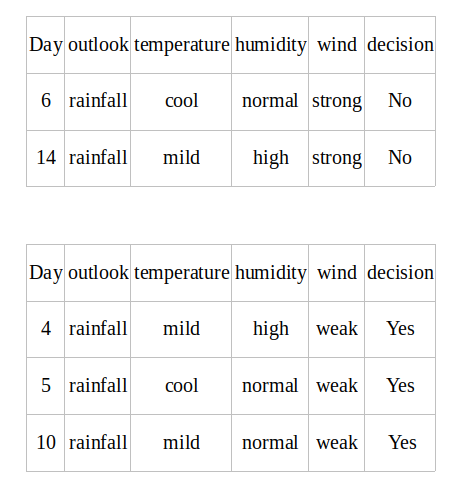



As seen from tables above:

decision = no when outlook = rain and wind = strong

decision = yes when outlook = rain and wind = weak

Therefore, we have 2 leaf nodes

The final tree will be as follows:

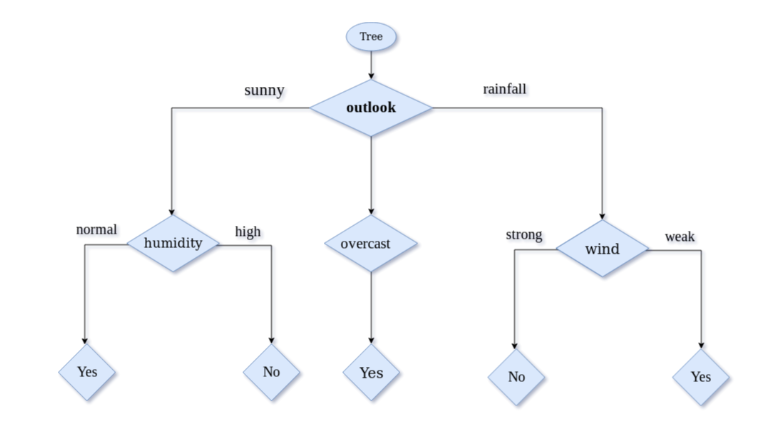